### 0.라이브러리 불러오기

In [1]:
# 형태소 분석/텍스트 클리닝
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk import word_tokenize
import pandas as pd 
from tqdm import tqdm
from konlpy.tag import Okt
import re

# 단어 추가를 위함
from ckonlpy.tag import Twitter


##### konlpy.tag import Okt에 단어 추가하기
- https://inspiringpeople.github.io/data%20analysis/ckonlpy/

In [2]:
# pip install customized_konlpy

In [3]:
# ## 테스트
# twitter = Twitter()

# print(twitter.nouns('문제해결능력'))
# twitter.add_dictionary(['문제해결능력','DBMS'], 'Noun')

# print(twitter.nouns('문제해결능력'))
# print(twitter.nouns('DBMS'))

### 1.데이터 불러오기 
- df1 = df[["com", "date", "duty", "doc"]]

In [4]:
df = pd.read_csv('기업데이터(30)_(전처리).csv').iloc[:, 1:]
df.columns = ["com", "date", "duty", "status", "star", "summary", "good", "bad", "expect", "doc"]
df.head()
df1 = df[["com", "date", "duty", "doc"]]

In [5]:
df1.head(1)

,com,date,duty,doc
0,네이버,2022. 11,디자인,커리어 경력 쌓고 싶은 사람에게 추천 수평적 사무실 분위기와 복지가 다른 곳 보다는...


### 2.불용어, 숫자, 띄어쓰기, 특수문자, 의성어, 이모티콘 Cleaning
- doc -> cleaning

In [6]:

def clean_text(texts):
    #이모티콘 제거
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            "]+", flags=re.UNICODE)

    #분석에 어긋나는 불용어구 제외 (특수문자, 의성어)
    han = re.compile(r'[ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')
    
    corpus = []
    for i in range(0, len(texts)):
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts[i])) #remove punctuation
        review = re.sub(r'\d+','', review)# remove number
        review = review.lower() #lower case
        review = re.sub(r'\s+', ' ', review) #remove extra space
        # review = re.sub(r'<[^>]+>','',review) #remove Html tags
        review = re.sub(r'\s+', ' ', review) #remove spaces
        review = re.sub(r"^\s+", '', review) #remove space from start
        review = re.sub(r'\s+$', '', review) #remove space from the end
        review = re.sub(han, '', review) #remove 특수문자, 의성어
        review = re.sub(emoji_pattern, '', review) #remove 이모티콘
        corpus.append(review)
    return corpus

df1["cleaning"] = clean_text(df1["doc"])

C:\Users\user\AppData\Local\Temp\ipykernel_4416\2526087011.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["cleaning"] = clean_text(df1["doc"])


In [7]:
df1.head()

,com,date,duty,doc,cleaning
0,네이버,2022. 11,디자인,커리어 경력 쌓고 싶은 사람에게 추천 수평적 사무실 분위기와 복지가 다른 곳 보다는...,커리어 경력 쌓고 싶은 사람에게 추천 수평적 사무실 분위기와 복지가 다른 곳 보다는...
1,네이버,2022. 11,전문직,자유로운 복장 분위기가 일단 편해서 좋았어요. 물론 업무는 당연히 강도가 있어야 할...,자유로운 복장 분위기가 일단 편해서 좋았어요 물론 업무는 당연히 강도가 있어야 할 ...
2,네이버,2022. 11,IT/인터넷,워라밸과 성장을 동시에 챙길 수 있는 몇 안되는 기업 앞으로도 가장 전망이 좋은 플...,워라밸과 성장을 동시에 챙길 수 있는 몇 안되는 기업 앞으로도 가장 전망이 좋은 플...
3,네이버,2022. 11,IT/인터넷,개발자가 영향력을 좀 발휘하며 일할수 있는곳. it업계 1위 개발에만 집중하며 일할...,개발자가 영향력을 좀 발휘하며 일할수 있는곳 it업계 위 개발에만 집중하며 일할 수...
4,네이버,2022. 10,IT/인터넷,아르바이트 생이었지만 꿈의 직장이란게 이런 것이구나 느낄 수 있었다 휴가 연차 등 ...,아르바이트 생이었지만 꿈의 직장이란게 이런 것이구나 느낄 수 있었다 휴가 연차 등 ...


### 맞춤법검사기

In [68]:
# pip install git+https://github.com/ssut/py-hanspell.git

In [6]:
from hanspell import spell_checker

# sent = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 "
sent = "워라벨과 워라밸 그리고 네카라쿠배"
spelled_sent = spell_checker.check(sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)

워 라벨과 워라밸 그리고 네 카라쿨 배


In [2]:
df3 = df1[['processing']][10001:]
df1.head(1)
df2.head()
# len(df2)

NameError: name 'df1' is not defined

,processing,processing_revise
0,해외 현지채용이었만 괜히대기업이아님을 느낌 체계적임 직원들도좋았음 정말 엄청나게 큰...,해외 현지 채용이었니만 괜히 대기업이 아님을 느낌 체계적임 직원들도 좋았음 정말 엄...
1,인턴으로 지원할 시 전환에 대한 기대는 많이 하지 않도록합시다 회사에서는 느끼지못하...,인턴으로 지원할 시 전환에 대한 기대는 많이 하지 않도록 합시다 회사에서는 느끼지 ...
2,년에 끝낼 일을 개월만에 해치우는 엄청난 능력을 가지고 있는 기업 그래서 업계에서 ...,년에 끝낼 일을 개월만에 해치우는 엄청난 능력을 가지고 있는 기업 그래서 업계에서 ...
3,학교와 기업이 무엇이 다른지를 제대로 보고듣고배울 수 있는 회사 조직원이 타기업에 ...,학교와 기업이 무엇이 다른지를 제대로 보고 듣고 배울 수 있는 회사 조직원이 타기업...
4,국내최대기업이주는 타이틀과 보너스 누구도경험해보지못할근무환경 자율퇴근제를 비롯한 여...,국내 최대 기업이 주는 타이틀과 보너스 누구도 경험해보지 못할 근무환경 자율 퇴근제...
...,...,...
9994,좋은 선배님들로부터 많은 것을 배우고 성장하는 기간들이었음 연차를 마음대로 쓸 수 ...,좋은 선배님들로부터 많은 것을 배우고 성장하는 기간들이었음 연차를 마음대로 쓸 수 ...
9995,부서에 따라 다르겠지만 기술선도 기업은 아님 연차 마음대로 사용 가능 출퇴근도 유연...,부서에 따라 다르겠지만 기술 선도 기업은 아님 연차 마음대로 사용 가능 출퇴근도 유...
9996,일이 몰릴때 엄청 몰림 연구직 힘들어요 대기업 가장 기본적인 복지는 다 있음 작지도...,일이 몰릴 때 엄청 몰림 연구직 힘들어요 대기업 가장 기본적인 복지는 다 있으면 작...
9997,비교적 자유로운 분위기와 실력만 있다면 근무하기 괜찮음 연차를 눈치 안보고 쓸 수 ...,비교적 자유로운 분위기와 실력만 있다면 근무하기 괜찮음 연차를 눈치 안 보고 쓸 수...


In [118]:
df3 = df1[['processing']][10001:20000]
df3 = df3.reset_index(drop=True)
df3['processing_revise'] = ""
df3.head(1)
# df3['processing_revise']

,processing,processing_revise
0,해외 현지채용이었만 괜히대기업이아님을 느낌 체계적임 직원들도좋았음 정말 엄청나게 큰...,


In [119]:
for a in range(len(df3)):
    df3['processing_revise'][a] = spell_checker.check(df3['processing'][a]).checked


In [128]:
df_all = pd.concat([df2,df3], ignore_index=True)
df_all.head()

,processing,processing_revise
0,커리어 경력 쌓고 싶은 사람에게 추천 수평적 사무실 분위기와 복지가 다른 곳 보다는...,커리어 경력 쌓고 싶은 사람에게 추천 수평적 사무실 분위기와 복지가 다른 곳보다는 ...
1,자유로운 복장 분위기가 일단 편해서 좋았어요 물론 업무는 당연히 강도가 있어야 할 ...,자유로운 복장 분위기가 일단 편해서 좋았어요 물론 업무는 당연히 강도가 있어야 할 ...
2,워라밸과 성장을 동시에 챙길 수 있는 몇 안되는 기업 앞으로도 가장 전망이 좋은 플...,워라밸과 성장을 동시에 챙길 수 있는 몇 안 되는 기업 앞으로도 가장 전망이 좋은 ...
3,개발자가 영향력을 좀 발휘하며 일할수 있는곳 it업계 위 개발에만 집중하며 일할 수...,개발자가 영향력을 좀 발휘하며 일할 수 있는 곳 it업계 위 개발에만 집중하며 일할...
4,아르바이트 생이었지만 꿈의 직장이란게 이런 것이구나 느낄 수 있었다 휴가 연차 등 ...,아르바이트 생이었지만 꿈의 직장이란 게 이런 것이구나 느낄 수 있었다 휴가 연차 등...


In [148]:
df_all.to_csv('확인용.csv', encoding='utf-8-sig') # 20,000개

### 3.명사,동사 분리 및 불용어 제거
- processing -> token

In [15]:
twitter = Twitter()

# 필요한 단어 추가
twitter.add_dictionary(['워라벨','워라밸', '주말근무', '경영진', '적극', '인상', '전문', '업무량', '발휘', '생각',
                        '비효율', '직원복지', '꼰대', '타조직','안정적', '투명성', '비전', '공유',
                        '임직원',  '부서바이부서', '부바부', '비대면', '성장', '네임벨류', '네임밸류', '탑다운',
                          '네카라쿠배', '최신기술', '원격근무', '기업문화', '근무환경', '조직문화'], 'Noun')
twitter.add_dictionary(['새로운','차가운'], 'Adjective')

 # 한국어 불용어 사전 불러오기
 # 의미가 없거나 없어도 되는 단어를 모아놓은 파일
stopwords = list(pd.read_csv("stopwords_kej.csv")['words'])
# 크롤링한 내용을 보면서 불용어를 추가로 넣어줌(extend)
stopwords.extend(['에서','고','이다','는','한','씨', "것","거","게","데","이다","건","고","되다","되어다","걸","기",
                  "시","네","듯","랍니","중이","얘","스","도도", "나","수","개","내","기","제","저","인","있다","이렇다",
                  "그렇다","번","위","팅","분","인","링","란","포","두", "진짜", "하다" ,"이다" ,"가다", "이제" ,"들다"
                 "적", "하게", "했게", "하여도", "하여", "운", "한", "것", "하는", "편"]) 
# 혹시 중복이 되어 있을 수 있어 중복제거 해줌
stopwords = set(stopwords) 

# 형태소 분석 Function
def okt_pos_tagging(series, ):
    for string in tqdm(series):
        pos_words = twitter.pos(string, stem= True, norm = True) 
        words = [word for word, tag in pos_words if tag
                #  in ['Noun', 'Verb', 'Adjective', 'Adverb'] if word not in stopwords]
                in ['Noun', 'Verb', 'Adjective'] if word not in stopwords]
                #  in ['Noun'] if word not in stopwords]
    return words    
    
 

c:\Users\user\anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [17]:
for word, tag in twitter.pos(df1['cleaning'][0], stem= True, norm = True):
    if tag in ['Noun', 'Verb', 'Adjective']:
        if word not in stopwords:
            print(word)

커리어
경력
쌓다
싶다
사람
추천
수평
적
사무실
분위기
복지
편
같다
회사
시스템
비효율
적
부분
들이다
업무량
많다
그냥
간단
소통
자다
좋다


In [9]:
# 형태소 분석 적용
tokenizing_doc = []
for i in tqdm(df_all['processing_revise']):
    tokenizing_doc.append(okt_pos_tagging(i))
['token'] = tokenizing_doc #새로운 tokenizing이라는 컬럼에 키워드 형태로 만든 원리
# df1[["com", "date", "duty", "processing", "token"]]

NameError: name 'df_all' is not defined

### Word2Vec

In [374]:
# token = df1['cleaning']
# token

# StrProcessingRevise = " ".join(df1['cleaning'])
# target_list = StrProcessingRevise.split()
# target_list


In [354]:
model = Word2Vec(target_list,         # 리스트 형태의 데이터
                 sg=1,         # 0: CBOW, 1: Skip-gram
                 vector_size=300,     # 벡터 크기
                 window=3,     # 고려할 앞뒤 폭(앞뒤 3단어)
                 min_count=3,  # 사용할 단어의 최소 빈도(3회 이하 단어 무시)
                 workers=4)    # 동시에 처리할 작업 수(코어 수와 비슷하게 설정)

model.save('word2vec.model')

워투벡 모델 불러오기

In [355]:
model = Word2Vec.load('word2vec.model')

단어를 벡터로 변환하기

In [362]:
model.wv.most_similar('수평적')
# model.wv.most_similar(positive=['man', 'princess'], negative=['woman'])

KeyError: "Key '수평적' not present"

코사인을 이용한 거리 측정

In [240]:
def cosine_distance (model, word,target_list , num) :
    cosine_dict ={}
    word_list = []
    a = model.wv[word]
    for item in target_list :
        if item != word :
            b = model.wv[item]
            cos_sim = dot(a, b)/(norm(a)*norm(b))
            cosine_dict[item] = cos_sim
    dist_sort=sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True) ## in Descedning order 
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    return word_list[0:num]


In [229]:
sent = [row.split(' ') for row in df_all['processing_revise']]
# sent

In [230]:
# model = Word2Vec(sent, min_count=1,vector_size= 50,workers=3, window =3, sg = 1)

model = Word2Vec(sent,         # 리스트 형태의 데이터
                 vector_size=50,     # 벡터 크기
                 window=3,     # 고려할 앞뒤 폭(앞뒤 3단어)
                 min_count=1,  # 사용할 단어의 최소 빈도(n회 이하 단어 무시)
                 workers=4,
                 sg=1)         # 0: CBOW, 1: Skip-gram

In [348]:
model.wv.most_similar('워라밸')

KeyError: "Key '워라밸' not present"

In [264]:
StrProcessingRevise = " ".join(df_all['processing_revise'])
target_list = StrProcessingRevise.split()

In [278]:
target_list_v2 = target_list[:10000]

In [330]:

# from keras.layers import dot
import numpy as np

# tsne 한글깨짐
import matplotlib
from matplotlib import font_manager, rc
import platform

# 윈도우인 경우
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [280]:
# 유일한 Maker_Model 가져오기 
Maker_Model = list(df_all.processing_revise.unique()) ## only get the unique Maker_Model_Year
# 가장 유사한 Mercedes-Benz SLK-Class를 코사인 거리로 표시 
# cosine_distance(model,'워라밸', target_list_v2, 5)

5. T-SNE Visualizations
- 임베딩이라는 단어를 직접 시각화하기는 어렵습니다. 일반적으로 3차원 이상이기 때문입니다. T-SNE는 점 사이의 상대 쌍 거리를 유지하면서 차원 축소를 통해 고차원 데이터를 시각화하는 유용한 도구입니다. 이웃 관계가 보존되는 새로운 데이터 표현을 찾는 T-SNE라고 할 수 있습니다. 다음 코드는 T-SNE 플롯으로 임베딩 단어를 플롯하는 방법을 보여줍니다.

In [331]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.wv.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

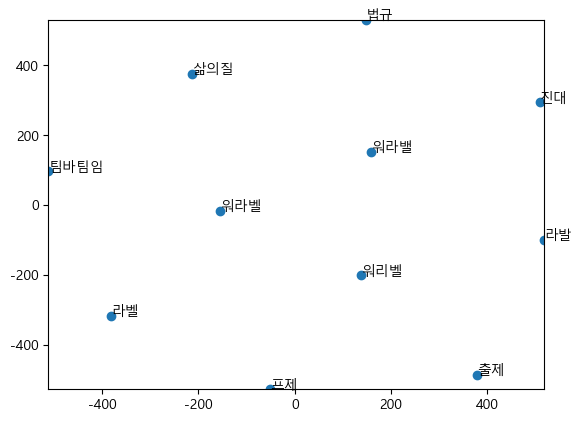

In [332]:
display_closestwords_tsnescatterplot(model, '워라밸')

In [342]:
df1.columns = ['com', 'date', 'duty', 'doc', 'cleaning', 'token']

In [134]:
# 모든 모듈을 불러 옴(LDA 기본 셋팅값)
from modules수업용 import *

# #!/usr/bin/env python
# # coding: utf-8

# import pandas as pd
# from konlpy.tag import Okt #형태소 분석
# from nltk import bigrams
# from nltk.util import ngrams
# import pandas as pd

# from gensim.models.ldamodel import LdaModel # LDA 분석
# import matplotlib.pyplot as plt
# from gensim.models.coherencemodel import CoherenceModel # 토픽갯수를 검증하기 위함
# from tqdm.notebook import tqdm
# from gensim import corpora
# from gensim.models import TfidfModel

# import warnings
# warnings.filterwarnings(action='ignore')

# okt=Okt()

# # #원하는 태그 추출 & 불용어 제거
# # def okt_pos_tagging(string):
    
# #     #불용어
# #     stopwords = pd.read_csv('ko-stopwords.csv')
# #     stopwords=list(stopwords['stopwords'])
# #     stopwords.extend(['에서','고','이다','는','한','씨', "것","거","게","데","이다","건","고","되다","되어다","걸","기",
# #                       "시","네","듯","랍니","중이","얘","스","도도", "나","수","개","내","기","제","저","인","있다","이렇다",
# #                       "그렇다","번","위","팅","분","인","링","란","포","두", "진짜", "하다" ,"이다" ,"가다", "이제" ,"들다",
# #                      "너무", "먹다"])
# #     stopwords=set(stopwords)    
# #     pos_words = okt.pos(string, stem=True, norm=True)
# #     words = [word for word, tag in pos_words if tag in ['Noun', 'Adjective', 'Verb'] if word not in stopwords ]
# #     return words


# #bigram 만드는 함수
# def bigram_(tokens):
    
#     #document 별 형태소분석기로 분리된 토큰들을 bigram으로 변환(토큰은 string 상태)
#     bigram_stack = [] #변환된 bigram
#     for token in tokens:
#         bigram = bigrams(token)
#         bigram_token = [' '.join(grams) for grams in bigram]
#         bigram_stack.append(bigram_token)
        
        
#     #bigram  딕셔너리 생성(아이디 매칭)
#     id2word = corpora.Dictionary(bigram_stack) #unigram
# #     id2word.token2id  #아이디가 매칭된 딕셔너리 확인용
        
    
    
#     #딕셔너리에 매칭한 corpus 생성
#     #생성한 bigram 딕셔너리에서 bigram_stack의 토큰을 아이디로 매칭변환
#     texts = bigram_stack 
#     corpus = [id2word.doc2bow(text) for text in texts]
    
    
#     #gensim으로 tf-idf 처리 #바이그램 요소 하나를 하나의 워드로 처리해서 tf_idf 점수
#     tfidf = TfidfModel(corpus) 
#     corpus_tfidf = tfidf[corpus]
#     tfidf_corpus = [x for x in corpus_tfidf]
#     return tfidf_corpus, corpus ,id2word




# #perplexcity 계산(그래프 생성, 테이블 생성)
# def perplexcity_graph(topic_n, bigram_result):
#     #topic_n _ 몇개 토픽을 테스트 해볼것인지 지정    
#     #perplexcity
#     perplexity_value = []
#     num_t = []
#     for i in topic_n:
#         model = LdaModel(bigram_result[0], num_topics = i, id2word=bigram_result[2])
#         num_t.append(i)
#         perplexity_value.append(model.log_perplexity(bigram_result[1]))

#     #그래프
#     plt.title('Perpelxity score')
#     plt.plot(topic_n, perplexity_value)
#     plt.xlabel('number of topics')
#     plt.ylabel('perplexity_scores')
#     plt.show
#     plt.savefig('Perplexity_Graph.png')  #그래프저장
    
    
#     #테이블 저장
#     perplexity_df = pd.DataFrame(list(zip(num_t,perplexity_value)), columns = ['cluster','perplexity_score'])
#     perplexity_df.to_csv('Perplexity_score_table.csv', encoding='utf-8-sig')
#     perplexity_df
    
    
    
    
    
# #coherence 계산(그래프 생성, 테이블 생성)    
# def coherence_graph(topic_n, bigram_result):
#     coherence_value = []
#     num_t = []

#     for i in topic_n:
#         model = LdaModel(bigram_result[0], num_topics = i, id2word=bigram_result[2])
#         cm = CoherenceModel(model=model, corpus=bigram_result[1], coherence='u_mass')
#         coherence = cm.get_coherence()
#         coherence_value.append(coherence)
#         num_t.append(i)

#     #그래프
#     plt.title('Coherence score')
#     plt.plot(topic_n, coherence_value)
#     plt.xlabel('number of topics')
#     plt.ylabel('coherence_scores')
#     plt.show
#     plt.savefig('Coherence_Graph.png')  #그래프저장

    
#     #테이블 저장
#     coherence_df = pd.DataFrame(list(zip(num_t,coherence_value)), columns = ['cluster','coherence_score'])
#     coherence_df.to_csv('Coherence_score_table.csv', encoding='utf-8-sig')
#     coherence_df
    
    
    
    
    
    
    
    
# #doc 문서별 토픽 추출하기
# def exctract_topic(ldamodel, corpus):
#     topic_n = []
#     topic_prop = []
#     all_topic_prop = []
#     for topic_doc in ldamodel[corpus]:
#         topic_doc = sorted(topic_doc, key=lambda x: (x[1]), reverse=True) #여러 토픽이 할당되어 있는경우 높은 확률의 토픽순으로 정렬
        
#         #확률 기준대로 정렬 했으므로 topic_doc[0] 제일 높은 확률의 토픽
#         topic_n.append(int(topic_doc[0][0]))
#         topic_prop.append(round(topic_doc[0][1],4))
#         all_topic_prop.append(topic_doc)
        
#     #데이터프레임화    
#     data = {'topic':topic_n, 'topic_weight' : topic_prop ,'topic_all_weight': all_topic_prop}
#     df = pd.DataFrame(data)
#     return df

In [135]:
# bigram을 적용하여 tf-idf기준으로 토큰과 맴핑
# 데이터프레임 형태의 토큰화된 단어들을 bigram형태로 변화하기 위한 작엄

# texts = df1['cleaningTokenize']
texts = df_all['token']
bigram_result = bigram_(texts)

In [142]:
bigram_result[:3]

([[(0, 0.3315814812799177),
   (1, 0.25129646283141516),
   (2, 0.3315814812799177),
   (3, 0.17156948152133022),
   (4, 0.28516633145242815),
   (5, 0.17982346329825366),
   (6, 0.2266005783077586),
   (7, 0.16660986742305126),
   (8, 0.17841350957067356),
   (9, 0.19621424931255552),
   (10, 0.2664295816167957),
   (11, 0.30837390636617296),
   (12, 0.30837390636617296),
   (13, 0.2947983453089552),
   (14, 0.20339300339401378),
   (15, 0.18702570489610076)],
  [(16, 0.1551441893776251),
   (17, 0.16228863048146236),
   (18, 0.1745021332188675),
   (19, 0.1745021332188675),
   (20, 0.12800099345604382),
   (21, 0.052926529333288744),
   (22, 0.07686307563400725),
   (23, 0.16228863048146236),
   (24, 0.1745021332188675),
   (25, 0.15007512774405712),
   (26, 0.1745021332188675),
   (27, 0.1357862455363827),
   (28, 0.16228863048146236),
   (29, 0.12678531423466027),
   (30, 0.11399404302031473),
   (31, 0.16228863048146236),
   (32, 0.1745021332188675),
   (33, 0.1745021332188675),
 

#### **3.LDA토픽의 갯수 테스트**
- perplexcity scroe 와 coherence scroe
    - 적절한 elbow point와 클러스터링된 원문을 보고 적절한 토픽 갯수를 선정함
    - check_topic_n변수에 테스트해볼 토픽의 갯수를 입력
    - 이때 토픽의 갯수는 range를 사용하여 입력

In [137]:
# 테스트 할 토픽의 갯수 입력, range(사이 숫자 입력)

check_topic_n = range(3,11) # 토픽의 갯수를 3~11개까지 추출하겠음

####  **[perplexcity score]**
- 군집의 복잡도를 의미함. 낮을수록 좋다고 평가함.

0it [00:00, ?it/s]

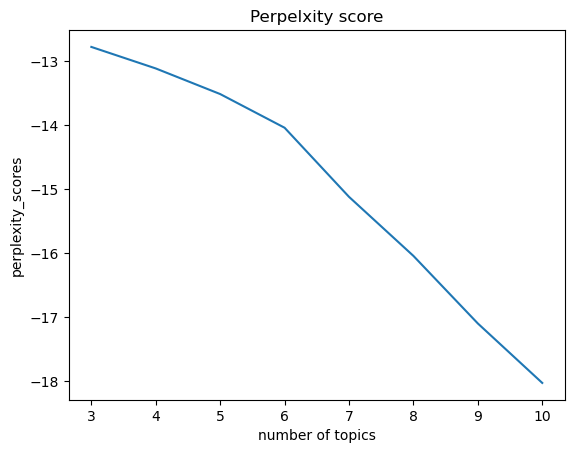

In [138]:
# 토픽의 갯수에 따라 달라지는 perplexcity점수를 보여줌
# 해당 그래프는 PNG형태로 저장됨
# 해당 그래프를 수치로 보여주는 table이 csv로 저장됨
from tqdm import tqdm
tqdm(perplexcity_graph(check_topic_n, bigram_result))

#### **[coherence score]**
- 군집의 일관성을 의미하여 높을수록 좋다고 평가한다.
- perplexcity와 coherence 점수가 완벽한 정답은 아니기에 결과를 보고 추가적으로 판단을 할 필요가 있음
- 토픽의 갯수에 따라 달라지는 coherence점수
- 꺽이는 지점에서 우선적으로 파악하는 것이 좋고.
- 일반도가 낮아지다가 상승한 부분은 군집화가 잘 되었다고 본다.
- 잘 나눠진 부분을 원문 볼 때 우선적으로 보면 좋음

#### **4.LDA시각화 라이브러리 확인**
- pyLDavis라이브러리를 활용해 LDA를 시각화 한다.
- 해당 라이브러리가 잘 작동하는지 확인하고 토픽별 할당괸 documents를 확인한다.

##### 4.1.시각화에 필요한 라이브러리 실행 및 설치
- pyLDAvix라이브러리가 없을 경우, pip install pyldavis

In [139]:
timport pyLDAvis
import pyLDAvis.gensim_models as gensimvis

c:\Users\user\anaconda3\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


##### 4.2.라이브러리 테스트

In [140]:
len(bigram_result)

3

In [141]:
# lda시각화가 잘 실행되는지 확인
# 해당코드에서 오류나면 라이브러리가 제대로 설치되었는지 확인 필요
model = LdaModel(bigram_result[0], num_topics=5, id2word=bigram_result[2])
visual = gensimvis.prepare(model, bigram_result[1], bigram_result[2])
pyLDAvis.display(visual)